In [ ]:
#import library
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# read data
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:,0:-1]
y_data = xy[:,[-1]]
x_data = np.array(x_data, dtype = np.float32)

#one-hot 클래스 type(0~6)
nb_classes = 7

#정수를 one-hot encoding 벡터로 변환
Y_one_hot = tf.one_hot(y_data, nb_classes) # one-hot encoding
y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes]) # reshape

#행렬의 수준을 맞춰준다
W = tf.Variable(tf.random.normal([16, 7]))
b = tf.Variable(tf.random.normal([7]))

#Leaning rate : 0.1
learning_rate = 1e-1

#소프트맥스 함수 구현부
def softmax_classfier():
  with tf.GradientTape() as tape: #자동미분함수 사용
    #cost function
    model_LC = tf.matmul(x_data, W) + b
    cost = tf.reduce_sum(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = model_LC, labels = y_one_hot)))
    gradients = tape.gradient(cost,(W,b))
    tf.optimizers.SGD(learning_rate).apply_gradients(zip(gradients,(W,b)))

cost_values = []
accuracy_values = []

#10,000번 학습 진행
for step in range(10001):
  softmax_classfier()
  model_LC = tf.matmul(x_data, W) + b
  #예측값 중에서 가장 확률이 높은 것으로 보정 0~6
  model = tf.argmax(tf.nn.softmax(model_LC),1)
  cost_fn = tf.reduce_sum(tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = model_LC, labels = y_one_hot)))
  accuracy = tf.reduce_mean(tf.cast(tf.equal(model, tf.argmax(y_one_hot,1)),tf.float32))

  accuracy_values.append(accuracy)
  cost_values.append(cost_fn)

  if step % 2000 == 0:
    p,y in zip(model, y_data.flatten())
    print("Step ", step,
          '\nAccuracy = ', accuracy.numpy(),
          '\ncost = ', cost_fn.numpy(),
          '\nModel\n', model.numpy(),
          "\n----------------------------------------------------------------\n")
    print("[{}] prediction : {} True Y: {}".format(p==int(y), p, int(y)))

Step  0 
Accuracy =  0.00990099 
cost =  5.8055935 
Model
 [2 2 5 2 2 2 2 5 5 1 2 5 5 4 1 1 2 2 5 5 5 2 2 2 2 5 2 2 2 5 2 2 2 5 5 1 2
 2 5 2 2 5 2 2 2 2 1 2 2 1 2 2 5 1 1 2 2 5 5 2 5 5 5 2 2 2 5 2 1 2 2 5 1 5
 5 1 5 5 5 5 5 2 5 2 2 1 5 2 2 2 2 5 5 2 2 2 2 2 2 2 2] 
--------------------------------------

Step  2000 
Accuracy =  1.0 
cost =  0.054008354 
Model
 [0 0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0 3 0 1 1 0 1 5 4 4 0 0 0 5 0 0 1 3 0 0
 1 3 5 5 1 5 1 0 0 6 0 0 0 0 5 4 6 0 0 1 1 1 1 3 3 2 0 0 0 0 0 0 0 0 1 6 3
 0 0 2 6 1 1 2 6 3 1 0 6 3 1 5 4 2 2 3 0 0 1 0 5 0 6 1] 
--------------------------------------

Step  4000 
Accuracy =  1.0 
cost =  0.028423259 
Model
 [0 0 3 0 0 0 0 3 3 0 0 1 3 6 6 6 1 0 3 0 1 1 0 1 5 4 4 0 0 0 5 0 0 1 3 0 0
 1 3 5 5 1 5 1 0 0 6 0 0 0 0 5 4 6 0 0 1 1 1 1 3 3 2 0 0 0 0 0 0 0 0 1 6 3
 0 0 2 6 1 1 2 6 3 1 0 6 3 1 5 4 2 2 3 0 0 1 0 5 0 6 1] 
--------------------------------------

Step  6000 
Accuracy =  1.0 
cost =  0.01946638 
Model
 [0 0 3 0 0 0 0 3 3 0 0 1 3 6 6

In [ ]:
# Test model

#원본 파일의 ROW를  type만 제외하고 붙여넣기
input_data = input("input data : ")
#입력받은 특성를 공백을 기준으로 리스트에 저장 후 정수형으로 형변환
feature = [int(i) for i in input_data.split()]

#모델 테스트 과정
test_x = np.array(feature, dtype = np.float32).reshape(1,16)
test_y_LC = tf.matmul(test_x, W) + b
#확률이 가장 높은  type으로 보정
test_y = tf.argmax(tf.nn.softmax(test_y_LC),1)

#예측된 타입 출력
print("predicted type : ", format(test_y))

input data : 0	0	1	0	0	1	1	1	1	0	0	1	0	1	0	0
predicted type :  [3]


In [ ]:
#소프트맥스 확률의 총 합이 1인지 확인
print(sum(sum(tf.nn.softmax(test_y_LC).numpy())))

1.0000001160426084


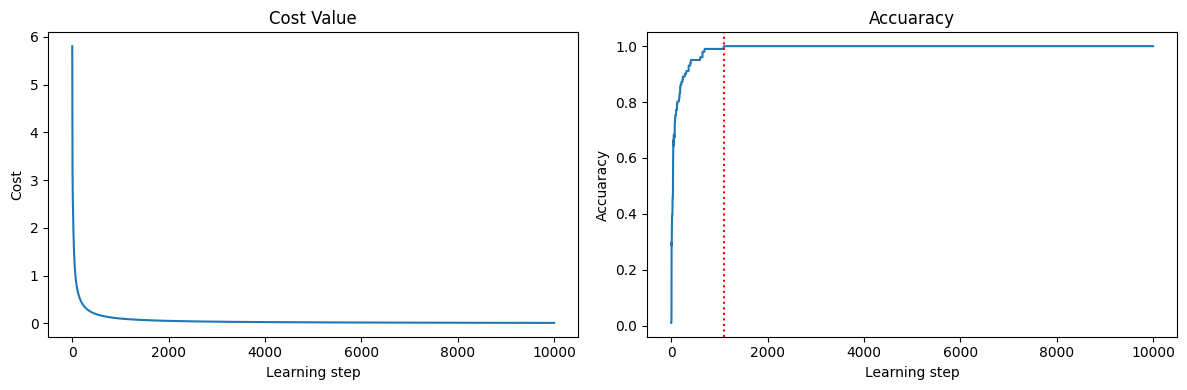

In [ ]:
#학습 단계에 따른 비용함수의 변화
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Cost Value")
plt.xlabel("Learning step")
plt.ylabel("Cost")
plt.plot(range(len(cost_values)), cost_values)

#학습 단계에 따른 모델 정확도의 변화
plt.subplot(1, 2, 2)
plt.title("Accuaracy")
plt.xlabel("Learning step")
plt.ylabel("Accuaracy")
plt.plot(range(len(accuracy_values)), accuracy_values)
plt.axvline(1100, color = 'red', linestyle = ':')

plt.tight_layout()
plt.show()

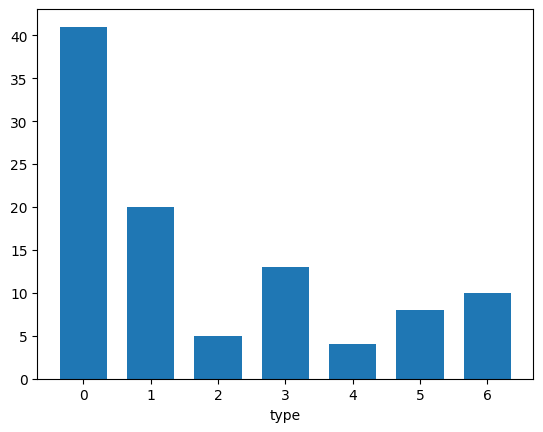

In [ ]:
plt.hist(model.numpy(), bins=np.arange(8) - 0.5 , rwidth = 0.7)
plt.xlabel("type")
plt.show()